In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('BTC-INR.csv')
df.shape

(2193, 7)

In [3]:
df.head

<bound method NDFrame.head of             Date          Open          High           Low         Close  \
0     2016-01-01  2.851343e+04  2.886422e+04  2.827371e+04  2.876377e+04   
1     2016-01-02  2.878284e+04  2.887821e+04  2.860059e+04  2.870443e+04   
2     2016-01-03  2.871370e+04  2.872463e+04  2.809664e+04  2.846729e+04   
3     2016-01-04  2.847060e+04  2.889777e+04  2.840446e+04  2.884299e+04   
4     2016-01-05  2.884153e+04  2.887593e+04  2.860620e+04  2.873450e+04   
...          ...           ...           ...           ...           ...   
2188  2021-12-28  3.800003e+06  3.800003e+06  3.542873e+06  3.556736e+06   
2189  2021-12-29  3.559353e+06  3.596734e+06  3.445272e+06  3.463408e+06   
2190  2021-12-30  3.466831e+06  3.566339e+06  3.434744e+06  3.511631e+06   
2191  2021-12-31  3.510979e+06  3.594116e+06  3.413930e+06  3.450574e+06   
2192  2022-01-01  3.450968e+06  3.563902e+06  3.449235e+06  3.553433e+06   

         Adj Close         Volume  
0     2.876377e+04   

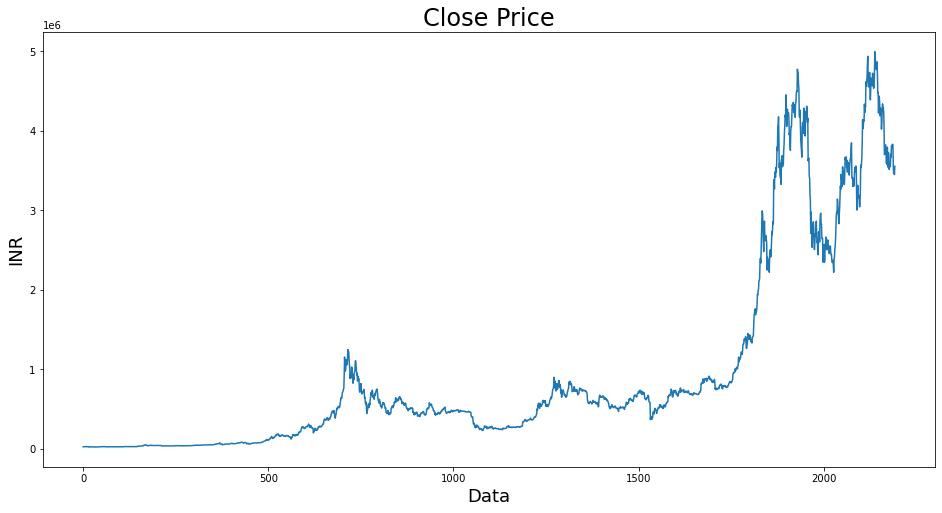

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('INR', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1755

In [6]:
dataset[:10]
dataset[-10:]

array([[3812273.5 ],
       [3817532.25],
       [3788061.5 ],
       [3830783.25],
       [3797046.  ],
       [3556736.  ],
       [3463408.25],
       [3511630.75],
       [3450573.5 ],
       [3553432.75]])

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00081996],
       [0.00080802],
       [0.00076031],
       ...,
       [0.70163085],
       [0.68934511],
       [0.71004211]])

In [8]:
train_data = scaled_data[0:training_data_len, :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([8.19963024e-04, 8.08023252e-04, 7.60305820e-04, 8.35904336e-04,
       8.14072721e-04, 7.93178807e-04, 1.19983730e-03, 1.12759423e-03,
       1.05202518e-03, 1.06013791e-03, 1.05877223e-03, 8.98742493e-04,
       8.55453400e-04, 8.59513497e-04, 0.00000000e+00, 3.16408885e-04,
       2.46262083e-04, 3.07043664e-04, 2.15661036e-04, 7.77567616e-04,
       6.29720134e-04, 2.30253567e-04, 2.98189737e-04, 5.08537396e-04,
       3.71467974e-04, 3.79592097e-04, 4.51872110e-04, 2.42554115e-04,
       2.14352735e-04, 1.97705986e-04, 6.90495426e-05, 1.27556039e-04,
       1.54404316e-04, 8.85066441e-05, 3.28525115e-04, 3.05688595e-04,
       1.68895846e-04, 1.75552502e-04, 1.47511859e-04, 1.71657859e-04,
       2.45805415e-04, 2.62913941e-04, 2.98347331e-04, 4.02460450e-04,
       6.13123689e-04, 5.18628098e-04, 6.49062872e-04, 7.58274003e-04,
       8.59295774e-04, 8.35000040e-04, 1.06087282e-03, 1.09316260e-03,
       1.07215864e-03, 8.39894872e-04, 8.78721828e-04, 9.09006115e-04,
     

In [9]:
len(X_train)

1695

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(1695, 60)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
X_train.shape

(1695, 60, 1)

In [13]:
test_data = scaled_data[training_data_len - 60 : , :]
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [14]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [15]:
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [16]:
model_1.compile(optimizer='adam', loss='mse')

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1695/1695 [==============================] - 64s 27ms/step - loss: 1.8906e-04
Epoch 2/10
1695/1695 [==============================] - 40s 24ms/step - loss: 8.8332e-05
Epoch 3/10
1695/1695 [==============================] - 42s 25ms/step - loss: 6.0315e-05
Epoch 4/10
1695/1695 [==============================] - 43s 25ms/step - loss: 5.7786e-05
Epoch 5/10
1695/1695 [==============================] - 79s 47ms/step - loss: 5.3753e-05
Epoch 6/10
1695/1695 [==============================] - 45s 26ms/step - loss: 5.0823e-05
Epoch 7/10
1695/1695 [==============================] - 44s 26ms/step - loss: 4.1108e-05
Epoch 8/10
1695/1695 [==============================] - 41s 24ms/step - loss: 4.5869e-05
Epoch 9/10
1695/1695 [==============================] - 43s 25ms/step - loss: 4.0217e-05
Epoch 10/10
1695/1695 [==============================] - 42s 25ms/step - loss: 4.3637e-05


In [18]:
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

438

In [19]:
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

206944.91680936073

Text(0.5, 0, 'epochs')

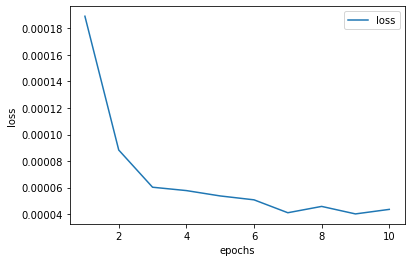

In [20]:
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [21]:
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))
model_2.compile(optimizer='Adam', loss='mse')
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
1695/1695 [==============================] - 64s 27ms/step - loss: 1.8906e-04
Epoch 2/6
1695/1695 [==============================] - 41s 24ms/step - loss: 8.8332e-05
Epoch 3/6
1695/1695 [==============================] - 42s 24ms/step - loss: 6.0315e-05
Epoch 4/6
1695/1695 [==============================] - 42s 25ms/step - loss: 5.7786e-05
Epoch 5/6
1695/1695 [==============================] - 40s 24ms/step - loss: 5.3753e-05
Epoch 6/6
1695/1695 [==============================] - 42s 24ms/step - loss: 5.0823e-05


In [22]:
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

438

In [23]:
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

476833.39497716894

C:\Users\Admin\AppData\Local\Temp/ipykernel_2908/3746447116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
C:\Users\Admin\AppData\Local\Temp/ipykernel_2908/3746447116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


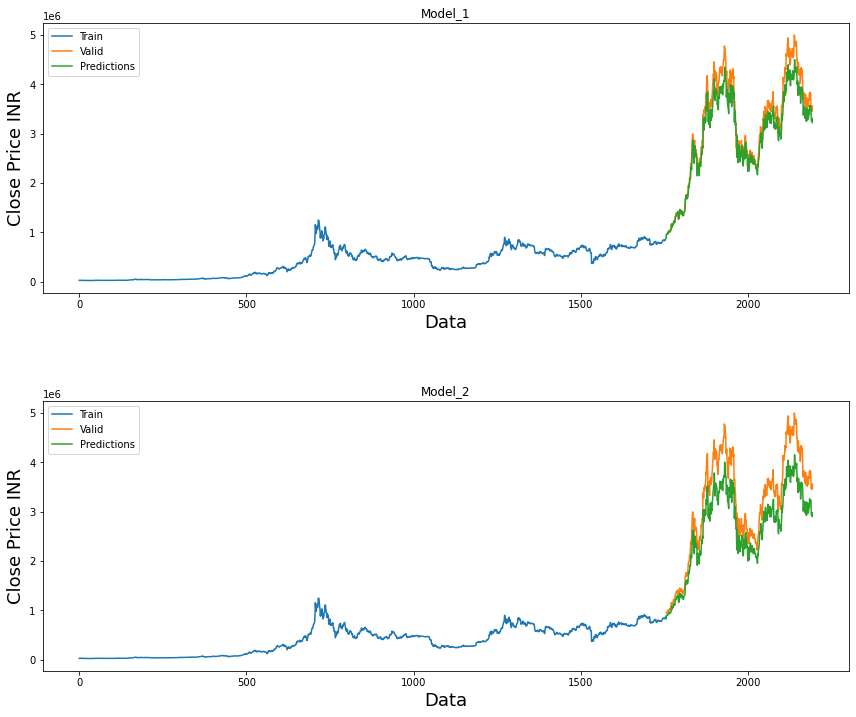

In [24]:
train = data[:training_data_len]
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.subplot(2, 1, 2)
plt.title('Model_2')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [25]:
last_60_days = data[-60:].values
last_60_days_scaled = scaler.fit_transform(last_60_days)
new_X_test = []
new_X_test.append(last_60_days_scaled)
new_X_test = np.array(new_X_test)
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
pred_price = model_1.predict(new_X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3551449.8]]
